<a href="https://colab.research.google.com/github/kalirajann/EnergyModels-MNIST/blob/main/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Imports and Data Loading
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")
x_train = (x_train - 127.5) / 127.5  # Normalize images to [-1, 1] for GAN
batch_size = 256
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(batch_size)

print("Data loaded and normalized.")



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Data loaded and normalized.


In [2]:
# Cell 2: Define GAN Architecture
latent_dim = 100

def build_generator():
    model = keras.Sequential([
        layers.Dense(7 * 7 * 128, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7, 7), activation="tanh", padding="same")  # Output in [-1, 1]
    ], name="generator")
    return model

def build_discriminator():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same", input_shape=(28, 28, 1)),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ], name="discriminator")
    return model

generator = build_generator()
discriminator = build_discriminator()

# Compile models
discriminator.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
)
discriminator.trainable = False  # Fix Discriminator weights when training the combined GAN

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
)

print("Models built and compiled.")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Models built and compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/50 - D Loss: 0.9082 - G Loss: 0.3786
Epoch 2/50 - D Loss: 0.9682 - G Loss: 0.3272
Epoch 3/50 - D Loss: 0.9910 - G Loss: 0.3083
Epoch 4/50 - D Loss: 1.0042 - G Loss: 0.2978
Epoch 5/50 - D Loss: 1.0141 - G Loss: 0.2903
Epoch 6/50 - D Loss: 1.0211 - G Loss: 0.2849
Epoch 7/50 - D Loss: 1.0267 - G Loss: 0.2808
Epoch 8/50 - D Loss: 1.0311 - G Loss: 0.2777
Epoch 9/50 - D Loss: 1.0345 - G Loss: 0.2752
Epoch 10/50 - D Loss: 1.0379 - G Loss: 0.2728


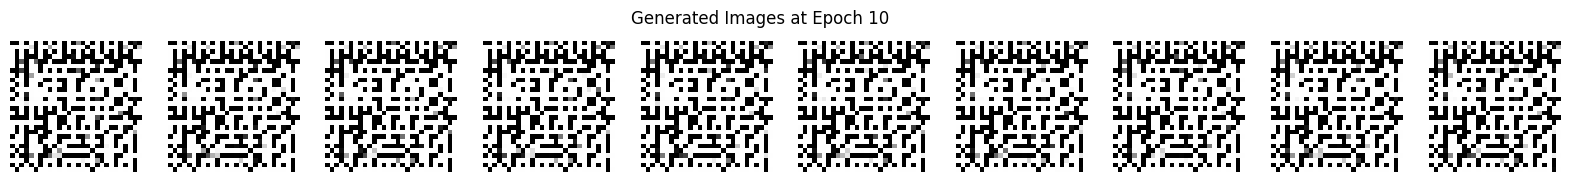

Epoch 11/50 - D Loss: 1.0420 - G Loss: 0.2701
Epoch 12/50 - D Loss: 1.0460 - G Loss: 0.2676
Epoch 13/50 - D Loss: 1.0500 - G Loss: 0.2651
Epoch 14/50 - D Loss: 1.0536 - G Loss: 0.2629
Epoch 15/50 - D Loss: 1.0571 - G Loss: 0.2608
Epoch 16/50 - D Loss: 1.0603 - G Loss: 0.2588
Epoch 17/50 - D Loss: 1.0635 - G Loss: 0.2569
Epoch 18/50 - D Loss: 1.0665 - G Loss: 0.2552
Epoch 19/50 - D Loss: 1.0692 - G Loss: 0.2535
Epoch 20/50 - D Loss: 1.0718 - G Loss: 0.2520


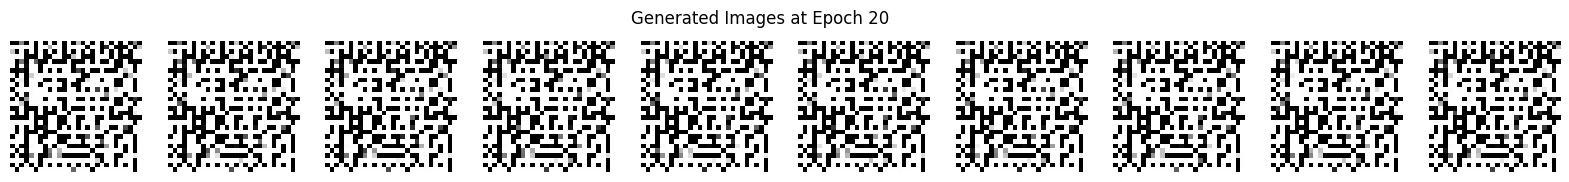

Epoch 21/50 - D Loss: 1.0744 - G Loss: 0.2506
Epoch 22/50 - D Loss: 1.0771 - G Loss: 0.2491
Epoch 23/50 - D Loss: 1.0798 - G Loss: 0.2476
Epoch 24/50 - D Loss: 1.0828 - G Loss: 0.2460
Epoch 25/50 - D Loss: 1.0860 - G Loss: 0.2443
Epoch 26/50 - D Loss: 1.0892 - G Loss: 0.2426
Epoch 27/50 - D Loss: 1.0929 - G Loss: 0.2408
Epoch 28/50 - D Loss: 1.0966 - G Loss: 0.2389
Epoch 29/50 - D Loss: 1.1004 - G Loss: 0.2370
Epoch 30/50 - D Loss: 1.1043 - G Loss: 0.2351


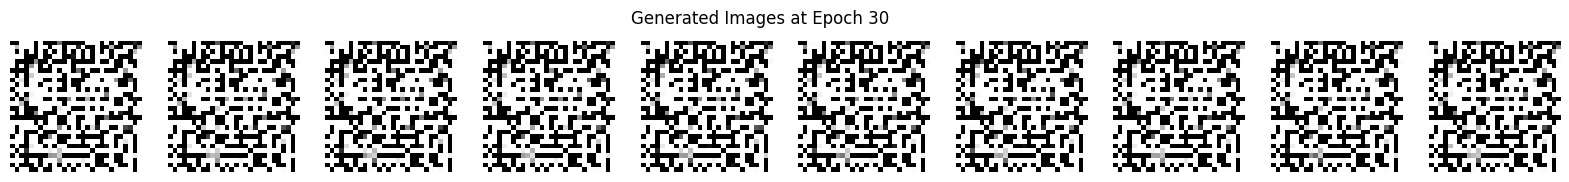

Epoch 31/50 - D Loss: 1.1083 - G Loss: 0.2332
Epoch 32/50 - D Loss: 1.1127 - G Loss: 0.2312
Epoch 33/50 - D Loss: 1.1172 - G Loss: 0.2292
Epoch 34/50 - D Loss: 1.1215 - G Loss: 0.2272
Epoch 35/50 - D Loss: 1.1256 - G Loss: 0.2254
Epoch 36/50 - D Loss: 1.1296 - G Loss: 0.2236
Epoch 37/50 - D Loss: 1.1335 - G Loss: 0.2219
Epoch 38/50 - D Loss: 1.1372 - G Loss: 0.2203
Epoch 39/50 - D Loss: 1.1407 - G Loss: 0.2187
Epoch 40/50 - D Loss: 1.1442 - G Loss: 0.2172


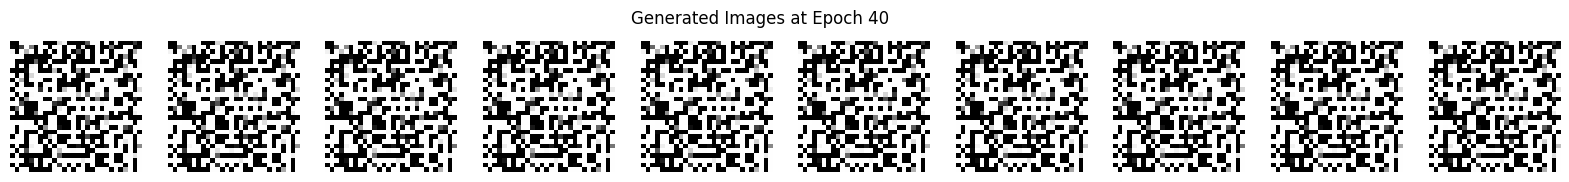

Epoch 41/50 - D Loss: 1.1478 - G Loss: 0.2156
Epoch 42/50 - D Loss: 1.1513 - G Loss: 0.2141
Epoch 43/50 - D Loss: 1.1547 - G Loss: 0.2127
Epoch 44/50 - D Loss: 1.1581 - G Loss: 0.2113
Epoch 45/50 - D Loss: 1.1613 - G Loss: 0.2099
Epoch 46/50 - D Loss: 1.1646 - G Loss: 0.2085
Epoch 47/50 - D Loss: 1.1679 - G Loss: 0.2072
Epoch 48/50 - D Loss: 1.1713 - G Loss: 0.2058
Epoch 49/50 - D Loss: 1.1745 - G Loss: 0.2045
Epoch 50/50 - D Loss: 1.1778 - G Loss: 0.2032


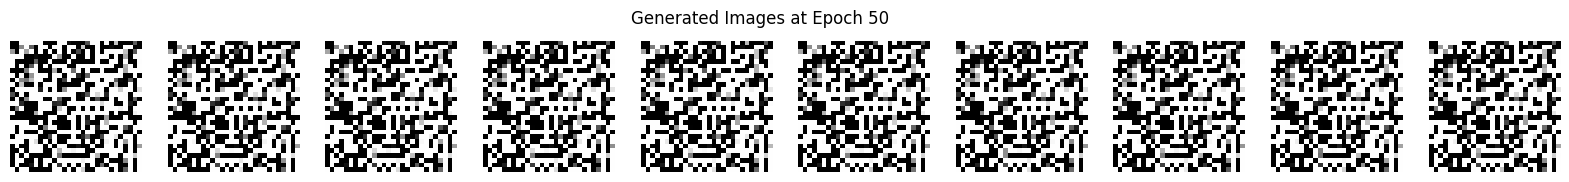

In [3]:
# Cell 3: Training Loop and Visualization
def plot_images(model, n=10, epoch=0):
    noise = tf.random.normal(shape=(n, latent_dim))
    generated_images = model(noise)
    generated_images = (generated_images * 127.5 + 127.5).numpy().astype("uint8")

    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

epochs = 50  # Set to at least 50 for decent results
for epoch in range(epochs):
    for real_images in dataset:
        curr_batch_size = tf.shape(real_images)[0]

        # 1. Train Discriminator
        noise = tf.random.normal(shape=(curr_batch_size, latent_dim))
        fake_images = generator(noise)

        # Labels
        real_labels = tf.ones((curr_batch_size, 1))
        fake_labels = tf.zeros((curr_batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 2. Train Generator
        noise = tf.random.normal(shape=(curr_batch_size, latent_dim))
        gan_labels = tf.ones((curr_batch_size, 1))  # Trick D into thinking these are real
        g_loss = gan.train_on_batch(noise, gan_labels)

    print(f"Epoch {epoch+1}/{epochs} - D Loss: {d_loss:.4f} - G Loss: {g_loss:.4f}")
    if (epoch + 1) % 10 == 0:
        plot_images(generator, epoch=epoch+1)


In [4]:
# Cell 4: VAE Architecture
from tensorflow.keras import backend as K

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Define Encoder
latent_dim_vae = 2
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim_vae, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim_vae, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define Decoder
latent_inputs = keras.Input(shape=(latent_dim_vae,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

# Define VAE Model Class
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

print("VAE Architecture defined.")


VAE Architecture defined.


In [5]:
# Cell 5: Train VAE
# Reload data normalized to [0, 1] for VAE (Sigmoid output requires 0-1 range)
(x_train_vae, _), _ = keras.datasets.mnist.load_data()
mnist_digits = np.expand_dims(x_train_vae, -1).astype("float32") / 255.0

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Train for 100 epochs as requested in prompt for interpretation
vae.fit(mnist_digits, epochs=100, batch_size=128)


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - kl_loss: 2.6042 - loss: 217.3801 - reconstruction_loss: 214.7759
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 2.7592 - loss: 188.1499 - reconstruction_loss: 185.3907
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 3.9363 - loss: 176.0828 - reconstruction_loss: 172.1464
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 5.0280 - loss: 164.2951 - reconstruction_loss: 159.2671
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 5.2356 - loss: 161.2642 - reconstruction_loss: 156.0286
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 5.3534 - loss: 159.5614 - reconstruction_loss: 154.2081
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 5.4372 - loss: 158.3909 - reconstruction_loss: 152.9536
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 5.5118 - loss: 157.3628 - reconstruction_loss: 151.8510
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━

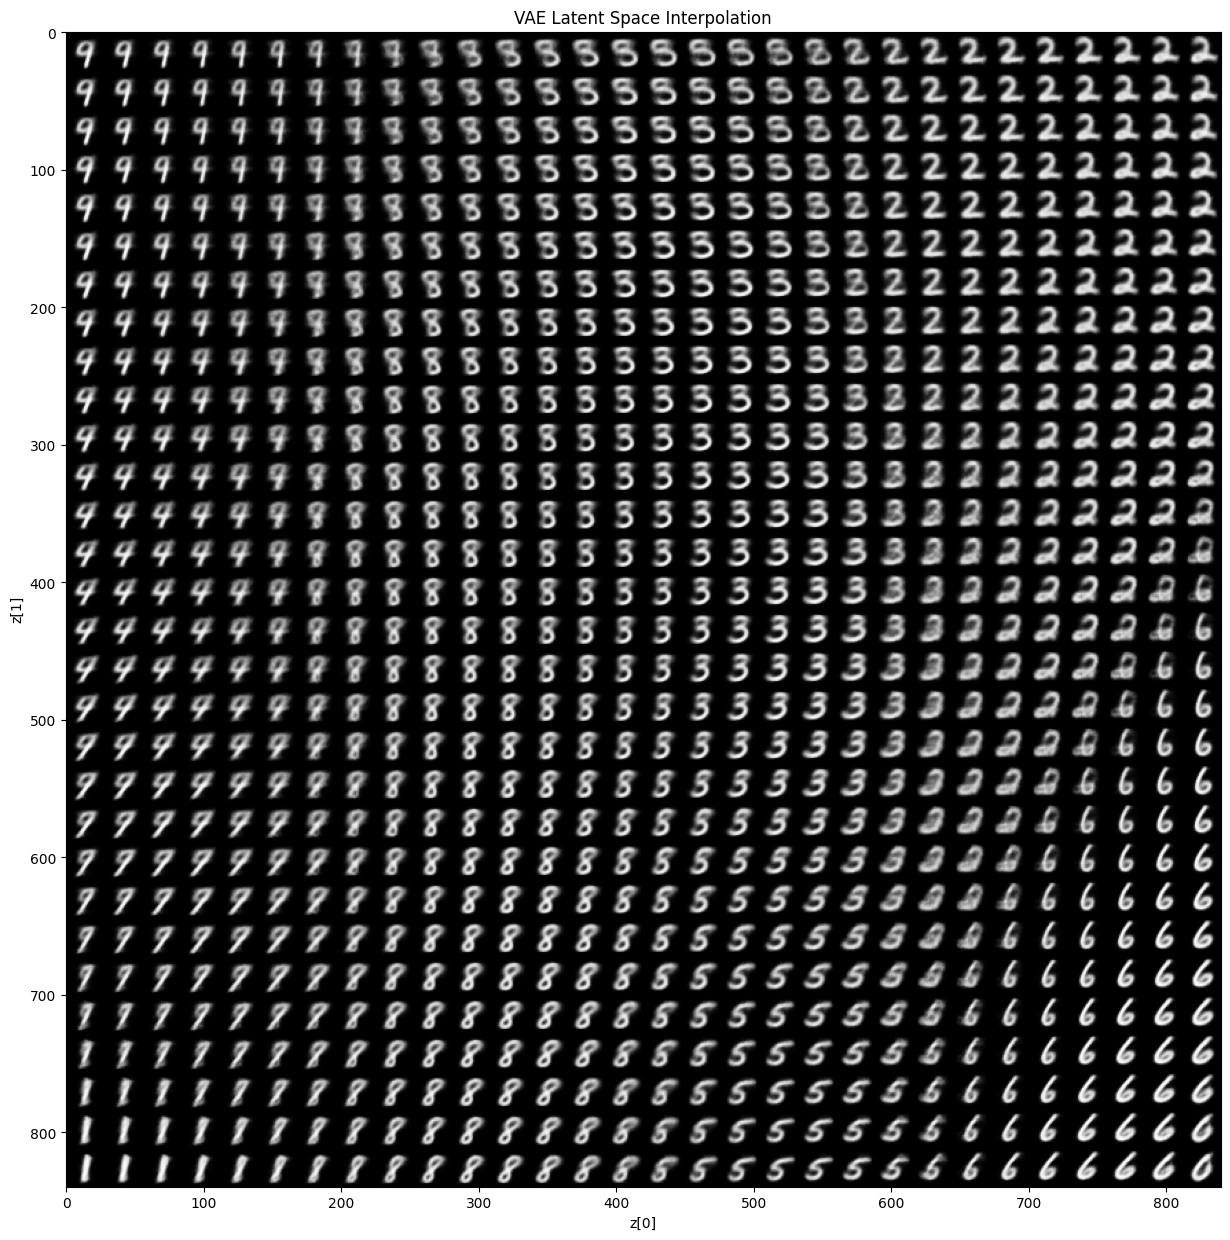

In [6]:
# Cell 6: Visualize Latent Space (Generation)
def plot_latent_space(vae, n=30, figsize=15):
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # Grid of (x, y) coordinates in latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.title("VAE Latent Space Interpolation")
    plt.show()

plot_latent_space(vae)
